# Fresnel Reflectance and Transmittance

**Scott Prahl**

*April 2020*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pypolar.fresnel as fresnel

Fresnel reflection treats the interaction of plane wave with a flat surface.  Usually, Fresnel reflection describes the interaction for a dielectric (e.g., glass), but the equations are sufficiently general that Fresnel reflection can handle semiconductors (e.g., silicon) and metals (e.g., gold) as well.  

The general assumption is that the incident light hits the surface at an angle $\theta$ from the normal and that the surface material is described by an index of refraction coefficient $m$.  The surface must be on an object/layer that is much thicker than the wavelength of light.

This notebook covers the `pypolar.fresnel` module and is organized

1. Nomenclature and equation
2. Complex index of refraction
3. Example uses

## Nomenclature and equations

### Plane of incidence

For Fresnel reflectance everything is relative to the plane-of-incidence.  This plane is shown below and includes the incoming beam and the normal to the surface.  The electric field is decomposed into two parts: the field parallel to the plane of incidence $E_p$ and the field perpendicular to the plane $E_s$.

$$
\mathrm{E} = E_s \hat{\mathbf{s}} + E_p \hat{\mathbf{p}}
$$

where $\hat{\mathbf{s}}$ and $\hat{\mathbf{p}}$ are unit vectors that lie in each plane (and are also perpendicular to the direction of beam propagation).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Plane_of_incidence.svg/500px-Plane_of_incidence.svg.png" width="50%">

When an electric plane wave from a vacuum and hits a flat surface at an angle $\theta$ from the normal to the surface then the reflected electric fields will be

$$
E_p = r_p E_{p0} \qquad\mbox{and}\qquad E_s = r_s E_{s0}
$$

How this affects the beam irradiance requires the Poynting vector which we will get to in a bit!

### Fresnel reflectance equations

The Fresnel field reflectances for an angle of incidence $\theta$ and an index of refraction $m$ describing the material that the surface is made from is

$$
r_p=r_\parallel =\frac{m^2\cos\theta-\sqrt{m^2-\sin^2\theta}}
                      {m^2\cos\theta+\sqrt{m^2-\sin^2\theta}},
$$

and

$$
r_s=r_\perp =\frac{\cos\theta-\sqrt{m^2-\sin^2\theta}}
                  {\cos\theta+\sqrt{m^2-\sin^2\theta}}.
$$

This particular formulation is best for computing because

1. it works for complex indices of refraction
2. it works for normal incidence ($\theta=0$)
3. it avoids calculating the transmitted angle


### Fresnel transmission equations

The Fresnel field transmission coefficients are

$$
t_p=t_\parallel =\frac{2m\cos\theta}
                      {m^2\cos\theta+\sqrt{m^2-\sin^2\theta}},
$$

and

$$
t_s=t_\perp =\frac{2\cos\theta}
                  {\cos\theta+\sqrt{m^2-\sin^2\theta}}.
$$

### Fresnel relations for irradiance


#### Poynting vector and irradiance

The Poynting vector describes the power flux (the energy per unit area per unit time) of an electromagnetic field,

$$
\mathbf{S} = \mathbf{E} \times \mathbf{H}
$$

The time-averaged Poynting vector is the irradiance (power/area).  For plane waves, this is

$$
I = \langle \mathbf{S}\rangle = {n\over 2 Z_0} \mathbf{E}\cdot \mathbf{E}^* =  {m\over 2 Z_0} |\mathbf{E}|^2 =  {m\over 2 Z_0} (E_p^2 + E_s^2)
$$

where $I$ is the irradiance and

$$
Z_0=377\,\Omega
$$

is the impedance of free space. The factor of 2 arises from time averaging, and the index of refraction $m$ describes the medium being propagated through. 

> A note on units.  The field $E$ has units of Volts/meter and so $\langle \mathbf{S}\rangle$ has units of (Volts/meter)$^2$/Ohms.  From basic electricity, we know that power $P=V^2/R$ and so has units of Volts$^2$ per Ohm.  Therefore the time-averaged Poynting vector has units of  Watts/meter$^2$ which is the same as irradiance.

### Fresnel relations for irradiance

If the incident irradiance is designated by $I_0=I_{p0} + I_{s0}$ then the reflected irradiances can be written

$$
I_p = R_p I_{p0} \quad\mbox{and}\quad I_s = R_s I_{s0}
$$

or because the irradiance is the square of the electric field

$$
I_p = |r_p|^2 I_{p0} \quad\mbox{and}\quad I_s = |r_s|^2 I_{s0}
$$

Therefore the reflection coefficients for irradiance are

$$
R_p=R_\parallel =|r_p|^2 = \left|\frac{m^2\cos\theta-\sqrt{m^2-\sin^2\theta}}
                                      {m^2\cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2,
$$

and

$$
R_s=R_\perp =|r_s|^2 = \left|\frac{\cos\theta-\sqrt{m^2-\sin^2\theta}}
                                  {\cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2.
$$

The equations for transmission are a bit trickier because the beam changes cross-sectional area across the boundary

$$
T_p = T_\parallel = \frac{\sqrt{m^2-\sin^2\theta} }{ \cos\theta}|t_p|^2 
= \cos\theta \sqrt{m^2-\sin^2\theta}\,\,\left|\frac{2m}{m^2\cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2
$$

and

$$
T_s = T_\perp =  \frac{\sqrt{m^2-\sin^2\theta} }{ \cos\theta}|t_s|^2
= \cos\theta \sqrt{m^2-\sin^2\theta}\,\,\left|\frac{2}{\cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2
$$

## Refractive Index

In general, the index of refraction is a complex number

$$
m = n - i \kappa
$$

* For dielectric materials (glass,water,etc.) the index is real ($\kappa=0$
* $\kappa$ represents the absorption of the field by the medium
* the sign of imaginary part is negative.  


### Complex Refractive Index of Water
Let's import and plot some data from the M.S. Thesis of D. Segelstein, "The Complex Refractive Index of Water",
University of Missouri--Kansas City, (1981) to get some sense the complex index of refraction.  The imaginary part shows absorption peaks at 3 and 6 microns, as well as the broad peak starting at 10 microns.

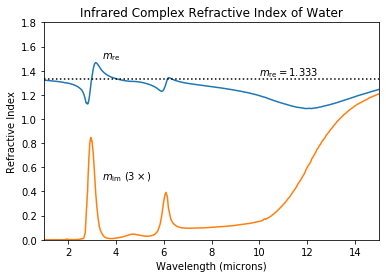

In [2]:
#import the Segelstein data
h2o = np.genfromtxt('http://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

#plot it
plt.plot(h2o_lam,h2o_mre)
plt.plot(h2o_lam,h2o_mim*3)
plt.plot((1,15),(1.333,1.333),':k')
plt.xlim((1,15))
plt.ylim((0,1.8))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(3.4,1.5))
plt.annotate(r'$m_\mathrm{im}\,\,(3\times)$', xy=(3.4,0.5))
plt.annotate(r'$m_\mathrm{re}=1.333$', xy=(10,1.36))

plt.title('Infrared Complex Refractive Index of Water')

plt.show()

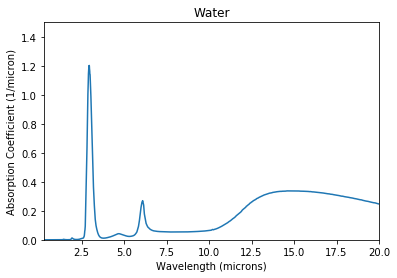

In [3]:
mua = 4*np.pi* h2o_mim/h2o_lam

plt.plot(h2o_lam,mua)
plt.xlim((0.3,20))
plt.ylim((0,1.5))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Absorption Coefficient (1/micron)')

plt.title('Water')

plt.show()

### Complex Refractive Index of Germanium

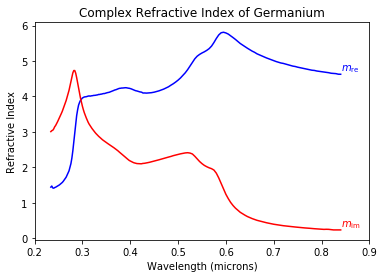

In [4]:
# import the Jellison data for germanium
ge = np.genfromtxt('https://refractiveindex.info/tmp/data/main/Ge/Jellison.txt', delimiter='\t')

# data is stacked so need to rearrange
N = len(ge)//2
ge_lam = ge[1:N,0]
ge_mre = ge[1:N,1]
ge_mim = ge[N+1:,1]

plt.plot(ge_lam,ge_mre,color='blue')
plt.plot(ge_lam,ge_mim,color='red')
plt.xlim((0.2,0.9))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(ge_lam[-1],ge_mre[-1]),va='bottom',color='blue')
plt.annotate(r'$m_\mathrm{im}$', xy=(ge_lam[-1],ge_mim[-1]),va='bottom',color='red')

plt.title('Complex Refractive Index of Germanium')

plt.show()

### Complex Refractive Index of Gold

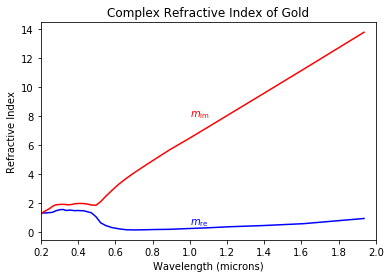

In [5]:
# import the Johnson and Christy data for gold
au = np.genfromtxt('https://refractiveindex.info/tmp/data/main/Au/Johnson.txt', delimiter='\t')

# data is stacked so need to rearrange
N = len(au)//2
au_lam = au[1:N,0]
au_mre = au[1:N,1]
au_mim = au[N+1:,1]

plt.plot(au_lam,au_mre,color='blue')
plt.plot(au_lam,au_mim,color='red')
plt.xlim((0.2,2))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(1.0,0.5),color='blue')
plt.annotate(r'$m_\mathrm{im}$', xy=(1.0,8),color='red')

plt.title('Complex Refractive Index of Gold')

plt.show()

## Dielectric Examples

For dielectrics like glass, $\kappa=0$ and the reflectance as a function of angle looks like
The angle at which $R_p$ goes is a minimum in dielectrics is called *Brewster's angle* $\theta_B$.  For semiconductors and metals this angle is called the *principal angle of incidence*.

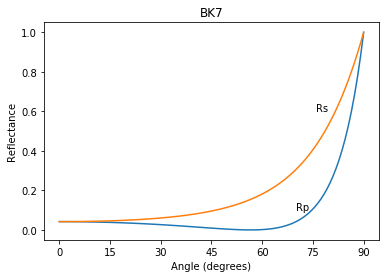

In [6]:
# BK7
m = complex(1.51508, 0.0)

N=100
theta = np.linspace(0,90,N)

Rp = fresnel.R_par(m, np.radians(theta))
Rs = fresnel.R_per(m, np.radians(theta))

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.annotate('Rs',  xy=(76, 0.6))
plt.annotate('Rp',  xy=(70, 0.1))
plt.title("BK7")
plt.xticks([0,15,30,45,60,75,90])


plt.show()

### Conservation of field energy at normal incidence

At normal incidence $\theta=0$, 
$$
t_\bot+(-r_\bot)=1
$$
and 
$$
t_\parallel+r_\parallel=1
$$

In [7]:
rp = fresnel.r_par(1.5,0)
print('At normal incidence r_p=%.3f'%rp)
tp = fresnel.t_par(1.5,0)
print('At normal incidence t_p=%.3f'%tp)
print('tp+rp=%.3f'%(tp+rp))
print()

rs = fresnel.r_per(1.5,0)
print('At normal incidence r_s=%.3f'%rs)
ts = fresnel.t_per(1.5,0)
print('At normal incidence t_s=%.3f'%ts)
print('ts-rs=%.3f'%(ts-rs))

At normal incidence r_p=0.200
At normal incidence t_p=0.800
tp+rp=1.000

At normal incidence r_s=-0.200
At normal incidence t_s=0.800
ts-rs=1.000


### Conservation of irradiance at normal incidence

In [8]:
Rp = fresnel.R_par(1.5,0)
print('At normal incidence R_p=%.3f'%Rp)
Tp = fresnel.T_par(1.5,0)
print('At normal incidence T_p=%.3f'%Tp)
print('Tp+Rp=%.3f'%(Tp+Rp))

print()

Rs = fresnel.R_per(1.5,0)
print('At normal incidence R_s=%.3f'%Rs)
Ts = fresnel.T_per(1.5,0)
print('At normal incidence T_s=%.3f'%Ts)
print('Ts+Rs=%.3f'%(Ts+Rs))

At normal incidence R_p=0.040
At normal incidence T_p=0.960
Tp+Rp=1.000

At normal incidence R_s=0.040
At normal incidence T_s=0.960
Ts+Rs=1.000


### Conservation at other angles

If m is real, then 
$$
t_\bot(\theta)-r_\bot(\theta)=1
$$
but except for $\theta=0$
$$
t_\parallel(\theta)+r_\parallel(\theta)\ne1
$$

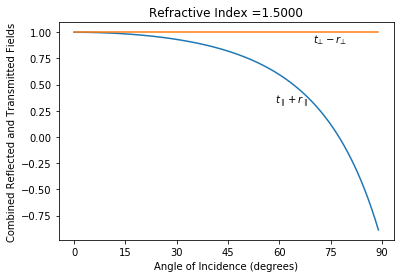

In [9]:
m=1.5
theta = np.linspace(0,89,90)
th = np.radians(theta)
rs = fresnel.r_per(m,th)
rp = fresnel.r_par(m,th)
ts = fresnel.t_per(m,th)
tp = fresnel.t_par(m,th)

plt.plot(theta,tp+rp)
plt.plot(theta,ts-rs)

plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Combined Reflected and Transmitted Fields")
plt.annotate(r'$t_\bot-r_\bot$',  xy=(theta[70], ts[70]-rs[70]),va='top')
plt.annotate(r'$t_\parallel+r_\parallel$  ',  xy=(theta[70], tp[70]+rp[70]),ha='right')
plt.title('Refractive Index =%.4f'%m)
plt.xticks([0,15,30,45,60,75,90])


plt.show()

###  Figure 4.41 in Hecht, *Optics*, 2002

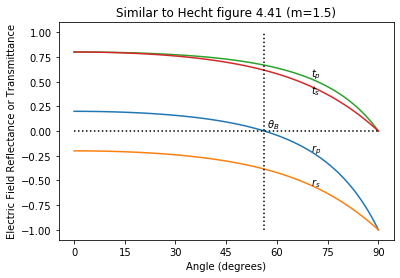

In [10]:
m = 1.5

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)

rp = fresnel.r_par(m,th)
rs = fresnel.r_per(m,th)
tp = fresnel.t_par(m,th)
ts = fresnel.t_per(m,th)

brewster = np.degrees(np.arctan(m))

plt.plot(theta,rp)
plt.plot(theta,rs)
plt.plot(theta,tp)
plt.plot(theta,ts)
plt.plot([0,90],[0,0],':k')
plt.plot([brewster,brewster],[-1,1],':k')
plt.xlabel("Angle (degrees)")
plt.ylabel("Electric Field Reflectance or Transmittance")
plt.annotate(r'$r_s$',  xy=(theta[70], rs[70]))
plt.annotate(r'$r_p$',  xy=(theta[70], rp[70]))
plt.annotate(r'$t_s$',  xy=(theta[70], 0.85*ts[70]))
plt.annotate(r'$t_p$',  xy=(theta[70], 1.05*tp[70]))
plt.annotate(r' $\theta_B$',  xy=(brewster, 0), va='bottom')

plt.xticks([0,15,30,45,60,75,90])


plt.title("Similar to Hecht figure 4.41 (m=1.5)")

plt.show()

###  Figure 4.42 in Hecht, *Optics*, 2002

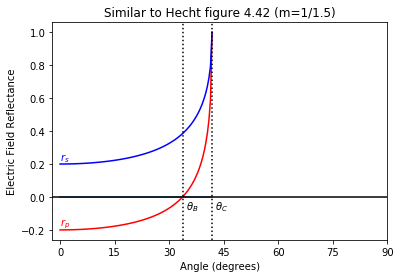

In [11]:
m = 1.0
n_i = 1.5

critical = np.degrees(fresnel.critical(m, n_i))
theta = np.linspace(0,critical,100)
theta_radians = np.radians(theta)

rp = fresnel.r_par(m, theta_radians, n_i)
rs = fresnel.r_per(m, theta_radians, n_i)

plt.plot(theta, rp.real, color='red')
plt.plot(theta, rs.real, color='blue')
plt.plot(theta, rp.imag)

plt.xlabel("Angle (degrees)")
plt.ylabel("Electric Field Reflectance")
plt.text(theta[0], rs[0], r'$r_s$', va='bottom', color='blue')
plt.text(theta[0], rp[0], r'$r_p$', va='bottom', color='red')

plt.title("Similar to Hecht figure 4.42 (m=1/1.5)")

brewster = np.degrees(fresnel.brewster(m, n_i))
plt.axvline(brewster, color='black', linestyle=':')
plt.text(brewster, -0.1, r' $\theta_B$', va='bottom')

plt.axvline(critical, color='black', linestyle=':')
plt.text(critical, -0.1, r' $\theta_C$',  va='bottom')

plt.axhline(0, color='black')

plt.xticks([0,15,30,45,60,75,90])



plt.show()

###  Figure 4.44 in Hecht, *Optics*, 2002

Now we test the phase shift.  This turned out to be a bit tricky, because python was chosing the wrong branch of the `sqrt()` function.  But once that was realized, the graphs match up nicely.

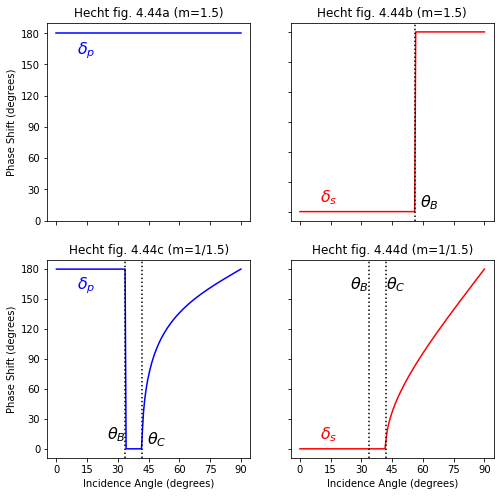

In [12]:
N=181
theta = np.linspace(0,90,N)
theta_radians = np.radians(theta)
tick_angles = [0,30,60,90,120,150,180]

m = 1.5
n_i = 1.0
rp = fresnel.r_par(m,theta_radians,n_i)
rs = fresnel.r_per(m,theta_radians,n_i)
brewster = np.degrees(fresnel.brewster(m, n_i))

plt.subplots(2,2,figsize=(8,8))

plt.subplot(2,2,1)
plt.title("Hecht fig. 4.44a (m=1.5)")
plt.plot(theta,np.degrees(np.angle(rs)), color='blue')
plt.ylabel("Phase Shift (degrees)")
plt.yticks(tick_angles)
plt.xticks([0,15,30,45,60,75,90])
plt.text(10,160,r"$\delta_p$", fontsize=16, color='blue')
plt.gca().tick_params(labelbottom=False)   

plt.subplot(2,2,2)
plt.title("Hecht fig. 4.44b (m=1.5)")
plt.plot(theta,np.degrees(np.angle(rp)), color='red')
plt.axvline(brewster, color='black', linestyle=':')
plt.yticks(tick_angles)
plt.xticks([0,15,30,45,60,75,90])
plt.text(brewster, -0.0, r' $\theta_B$ ', va='bottom', fontsize=16)
plt.text(10,10,r"$\delta_s$", fontsize=16, color='red')
plt.gca().tick_params(labelbottom=False,labelleft=False)   

m = 1
n_i = 1.5
rs = fresnel.r_per(m, theta_radians, n_i)
rp = fresnel.r_par(m, theta_radians, n_i)

brewster = np.degrees(fresnel.brewster(m, n_i))
critical = np.degrees(fresnel.critical(m, n_i))

plt.subplot(2,2,3)
plt.title("Hecht fig. 4.44c (m=1/1.5)")
plt.plot(theta, np.degrees(np.angle(rp)),color='blue')
plt.axvline(brewster, color='black', linestyle=':')
plt.axvline(critical, color='black', linestyle=':')
plt.xlabel("Incidence Angle (degrees)")
plt.ylabel("Phase Shift (degrees)")
plt.xticks([0,15,30,45,60,75,90])

plt.yticks(tick_angles)
plt.text(brewster, 10, r' $\theta_B$', ha='right', fontsize=16)
plt.text(critical, -0, r' $\theta_C$', va='bottom', fontsize=16)
plt.text(10,160,r"$\delta_p$", fontsize=16, color='blue')

plt.subplot(2,2,4)
plt.plot(theta, np.degrees(np.angle(rs)),color='red')
plt.xlabel("Incidence Angle (degrees)")
plt.xticks([0,15,30,45,60,75,90])

plt.yticks(tick_angles)
plt.title("Hecht fig. 4.44d (m=1/1.5)")
plt.axvline(brewster, color='black', linestyle=':')
plt.axvline(critical, color='black', linestyle=':')
plt.text(10,10,r"$\delta_s$", fontsize=16, color='red')
plt.text(brewster, 160, r' $\theta_B$', ha='right', fontsize=16)
plt.text(critical, 160, r'$\theta_C$', fontsize=16)
plt.gca().tick_params(labelleft=False)   

plt.show()

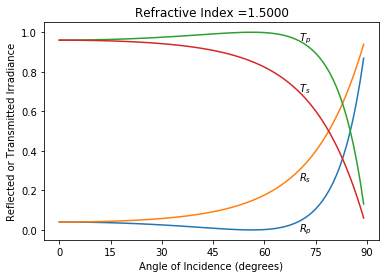

In [13]:
m=1.5
theta = np.linspace(0,89,90)
th = np.radians(theta)
Rs = fresnel.R_per(m,th)
Rp = fresnel.R_par(m,th)
Ts = fresnel.T_per(m,th)
Tp = fresnel.T_par(m,th)

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.plot(theta,Tp)
plt.plot(theta,Ts)

plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Reflected or Transmitted Irradiance")
plt.annotate(r'$R_s$',  xy=(theta[70], Rs[70]),va='top')
plt.annotate(r'$R_p$',  xy=(theta[70], Rp[70]),va='top')
plt.annotate(r'$T_s$',  xy=(theta[70], Ts[70]))
plt.annotate(r'$T_p$',  xy=(theta[70], Tp[70]))
plt.title('Refractive Index =%.4f'%m)
plt.xticks([0,15,30,45,60,75,90])


plt.show()

## Semiconductor Examples

For semi-conductors like germanium ($m=5.47392- j 0.771829$ at $\lambda$=633nm) the reflectance as a function of angle looks like 

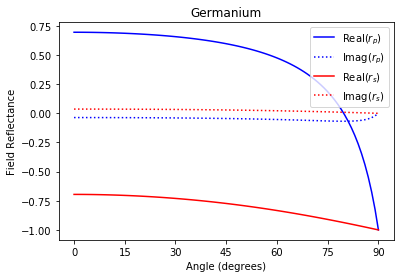

In [14]:
# Germanium
m = complex(5.47392, -0.771829)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)
rp = fresnel.r_par(m,th)
rs = fresnel.r_per(m,th)

plt.plot(theta,rp.real, 'b', label=r"Real($r_p$)")
plt.plot(theta,rp.imag, 'b:', label=r"Imag$(r_p)$")
plt.plot(theta,rs.real, 'r', label=r"Real$(r_s)$")
plt.plot(theta,rs.imag, 'r:', label=r"Imag$(r_s)$")
plt.xlabel("Angle (degrees)")
plt.ylabel("Field Reflectance")
plt.xticks([0,15,30,45,60,75,90])
#plt.annotate('Rs',  xy=(76, 0.8))
#plt.annotate('Rp',  xy=(70, 0.13))
plt.title("Germanium")
plt.legend()

plt.show()

## Metal Examples

### Gold

For metals like gold the index of refraction is $m=0.176717 - j 3.03779$ at $\lambda$=633nm. 
Note that the minimum in $R_p$ is much larger than zero and is called the *principal polarization angle*.

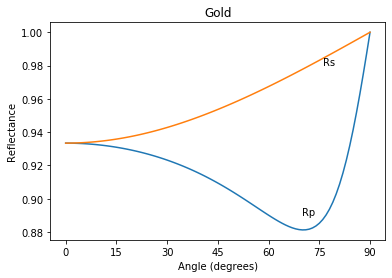

In [15]:
# Gold
m = complex(0.176717, -3.03779)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)

Rp = fresnel.R_par(m,th)
Rs = fresnel.R_per(m,th)

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.title("Gold")
plt.annotate('Rs',  xy=(76, 0.98))
plt.annotate('Rp',  xy=(70, 0.89))
plt.xticks([0,15,30,45,60,75,90])


plt.show()

### Nickel

See Tompkins, *A User's Guide to Ellipsometry,* 1993, figure 1-12 on page 44.

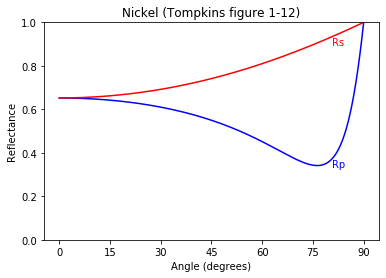

In [16]:
# Nickel
m = complex(2.01, -3.75)

N=181
theta = np.linspace(0,90,N)

th = np.radians(theta)
Rp = fresnel.R_par(m,th)
Rs = fresnel.R_per(m,th)

plt.plot(theta,Rp,color='blue')
plt.plot(theta,Rs,color='red')
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.annotate('Rs',  xy=(theta[-20], Rs[-20]),color='red',va='top')
plt.annotate('Rp',  xy=(theta[-20], Rp[-20]),color='blue',va='top')
plt.title("Nickel (Tompkins figure 1-12)")
plt.ylim(0,1)
plt.xticks([0,15,30,45,60,75,90])


plt.show()

## Ellipsometry graphs

### $\tan\psi$

One important parameter used in ellipsometry is the ratio of the parallel and perpendicular reflected light.
This is commonly expressed as $\tan\psi$ is defined as
$$
\tan\psi = {R_p/R_s}
$$

This non-dimensional parameter allows simple measurements of surfaces that give information about things like

* Film thickness
* Refractive Index ($n$) 
* Extinction Coefficient ($\kappa$) 
* Surface Roughness Anisotropy
* Retardation
* Phase Difference 
* Birefringence

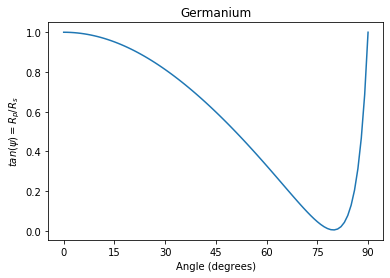

In [17]:
# Germanium
m = complex(5.47392, -0.771829)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)
tanpsi = fresnel.R_par(m,th)/fresnel.R_per(m,th)

plt.plot(theta,tanpsi)
plt.xlabel("Angle (degrees)")
plt.ylabel("$tan(\psi)=R_p/R_s$")
plt.title("Germanium")
plt.xticks([0,15,30,45,60,75,90])


plt.show()

### Behavior at 45°

Finally at 45$^\circ$ the square of the perpendicular reflectance equals the parallel reflectance
$$
R_s^2 = R_p
$$

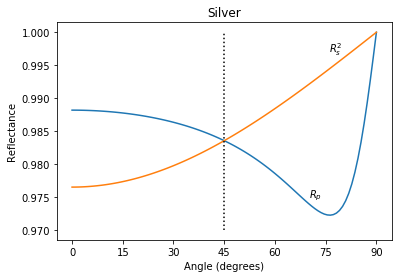

In [18]:
# Silver
m = complex(0.0574411, -4.27996)

N=100
theta = np.linspace(0,90,N)
th = np.radians(theta)
Rp = fresnel.R_par(m,th)
Rs = fresnel.R_per(m,th)**2

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.plot([45,45],[0.97,1.00],':k')
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.title("Silver")
plt.annotate('$R_s^2$',  xy=(76, 0.997))
plt.annotate('$R_p$',  xy=(70, 0.975))
plt.xticks([0,15,30,45,60,75,90])


plt.show()